In [13]:
#importing libraries for data wrangling
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
#Loadaing the dataset for data wrangling
mal  = pd.read_csv('Obfuscated-MalMem2022.csv')

In [3]:
#printing few first and last rows
print(mal.head())
print(mal.tail())

  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  4

# 3.1 Data Wrangling process

In [4]:
#Checking for high missing value with 60% percentage
given_value = 0.6
removable_column = mal.columns[mal.isnull().mean() > given_value]
print(removable_column)

Index([], dtype='object')


#There is no high missing value

In [5]:
#Checking for null values
blank = mal.isnull().sum()
print(blank)

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

#There is no null values

In [7]:
#Checking for NA values
not_available = mal.isna().sum()
print(not_available)

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

#There is no Nan values

In [8]:
#Checking for constant columns
constant_values = []
for column in mal.columns:
    if mal[column].nunique() == 1:
        constant_values.append(column)
print("Constant columns:", constant_values)

Constant columns: ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']


In [9]:
#Dropping constant columns
mal = mal.drop(constant_values, axis=1)

In [10]:
#Deopping duplicates
mal = mal.drop_duplicates()

In [11]:
# Checking for highly correlated columns
correlation = mal.corr().abs()
mask = correlation.where(~np.tril(np.ones(correlation.shape)).astype(bool))
highly_correlated_columns = [column for column in mask.columns if any(mask[column] > 0.9)]
print(highly_correlated_columns)

['dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile', 'handles.nevent', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'psxview.not_in_csrss_handles_false_avg', 'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg', 'svcscan.fs_drivers', 'svcscan.shared_process_services']


In [12]:
#Dropping highly correlated columns
mal = mal.drop(highly_correlated_columns, axis=1)

In [15]:
#Detecting outliers using zscore
numeral = mal.select_dtypes(include='number').columns
for column in numeral:
    
    # Finding z-scores for every entry in the column.
    z_index = (mal[column] - mal[column].mean()) / mal[column].std()
    
    # A threshold can be established to identify outliers, such as z-scores exceeding 3 or falling below -3.
    threshold = 3
    
    # Printing the values that deviate significantly from the rest of the data.
    outliers = mal[(z_index > threshold) | (z_index < -threshold)]
    print("Column contains Outliers", column)
    print(outliers)

Column contains Outliers pslist.nproc
                                                Category  pslist.nproc  \
66                                                Benign            60   
72                                                Benign            60   
78                                                Benign            65   
84                                                Benign            64   
87                                                Benign            63   
...                                                  ...           ...   
56384  Ransomware-Ako-0bedf54dfd10b05e806d379965ee8c3...            74   
56411  Ransomware-Ako-0be304a79df3a52f779940b70974a2b...            60   
56616  Ransomware-Ako-0cb5fad9a6e436deb0272984dae8da5...            63   
56712  Ransomware-Ako-0cd429445b95cf244042424dd871853...            79   
56789  Ransomware-Ako-0ce4a163694c42b9a12fb703fd7df92...            60   

       pslist.nppid  pslist.avg_threads  pslist.avg_handlers  dlllist.ndl

In [16]:
# Removing the outlier values
mal = mal[(z_index <= threshold) & (z_index >= -threshold)]

In [17]:
# Saving the cleaned dataset
mal.to_csv('cleaned_mal_dataset.csv', index=False)

# Descriptive Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Loading the cleaned data
mem = pd.read_csv('cleaned_mal_dataset.csv')

In [22]:
#Summary Statistics
statics_summary = mem.describe()
print(statics_summary)

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
count  58055.000000  58055.000000        58055.000000         58055.000000   
mean      41.408061     14.709620           11.350682           247.811479   
std        5.777606      2.661204            1.587651           112.289177   
min       22.000000      8.000000            1.650000            34.962500   
25%       40.000000     12.000000            9.973684           208.775000   
50%       41.000000     15.000000           11.022946           244.791849   
75%       43.000000     16.000000           12.867830           290.088208   
max      240.000000     72.000000           16.818182         24845.951220   

       dlllist.ndlls  handles.ndesktop  handles.nkey  handles.nsection  \
count   58055.000000      58055.000000  58055.000000      58055.000000   
mean     1813.056016         44.551288    775.234019        291.043597   
std       329.756143          5.160779    150.477790        144.419113   
m

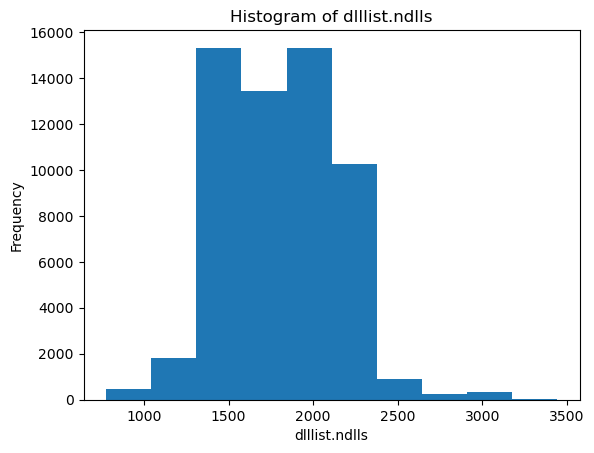

In [23]:
#Making a histogram.
histo_colum_selection = 'dlllist.ndlls'
plt.hist(mem[histo_colum_selection], bins=10)
plt.xlabel(histo_colum_selection)
plt.ylabel('Frequency')
plt.title('Histogram of ' + histo_colum_selection)
plt.show()

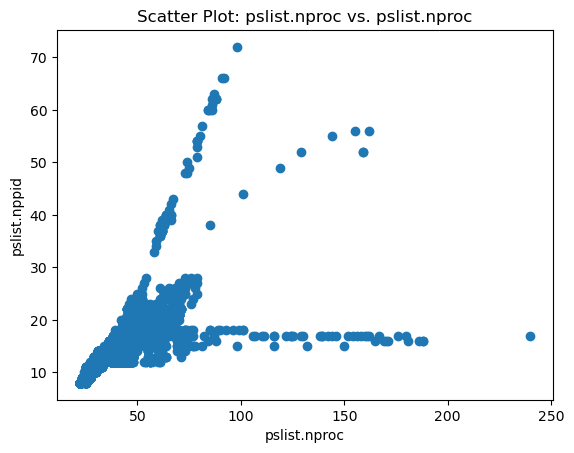

In [24]:
#Creating Scatter Plot
a = 'pslist.nproc' 
b = 'pslist.nppid'
plt.scatter(mem[a], mem[b])
plt.xlabel(a)
plt.ylabel(b)
plt.title('Scatter Plot: ' + a + ' vs. ' + a)
plt.show()

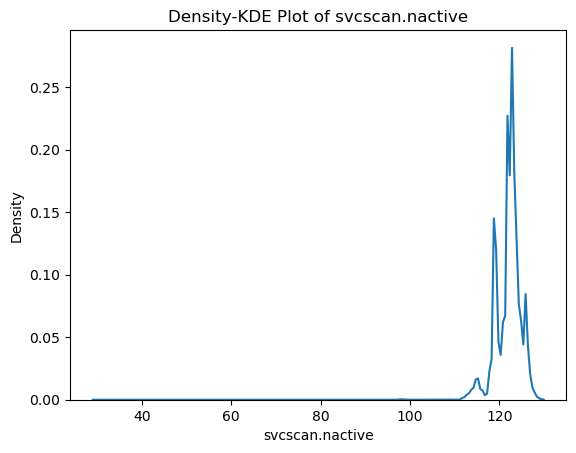

In [25]:
#Creayting Density-KDE Plot 
kde = 'svcscan.nactive'
sns.kdeplot(mem[kde])
plt.xlabel(kde)
plt.ylabel('Density')
plt.title('Density-KDE Plot of ' + kde)
plt.show()

# Diagnostic analysis

In [26]:
#Choosing the columns to generate scatter plots and correlation diagrams.
diagnosis = ['pslist.nproc', 'pslist.avg_threads', 'dlllist.ndlls', 'handles.ndesktop', 'malfind.ninjections', 'svcscan.nservices', 'Class']
analysis= mem[diagnosis]

In [27]:
#Calculating the correlation matrix for creating the plot
correlation_matrix = analysis.corr()

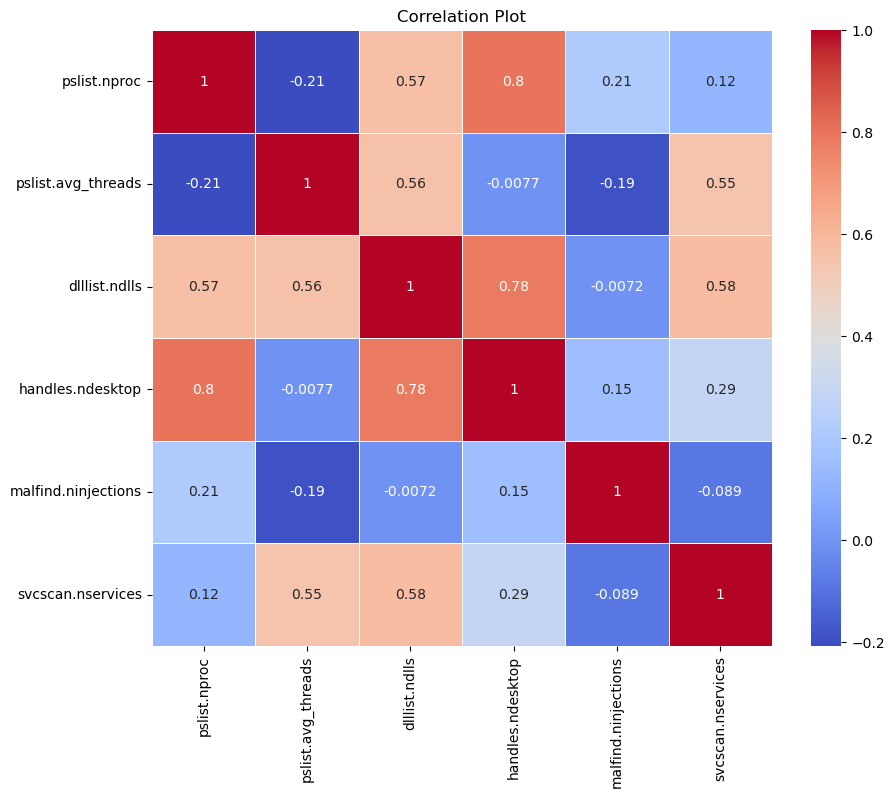

In [28]:
#Generating a plot to display correlation.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

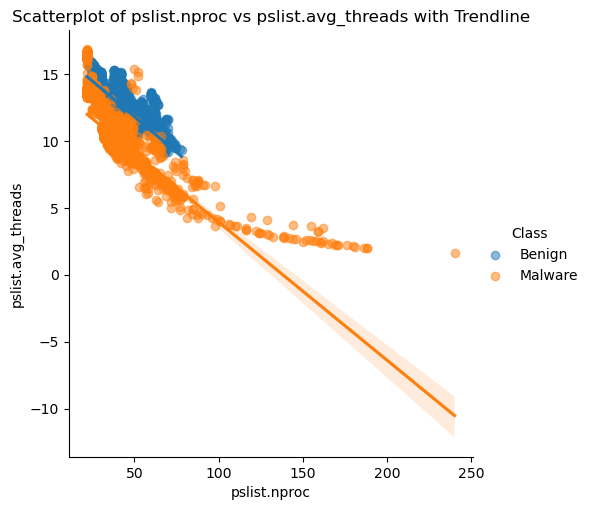

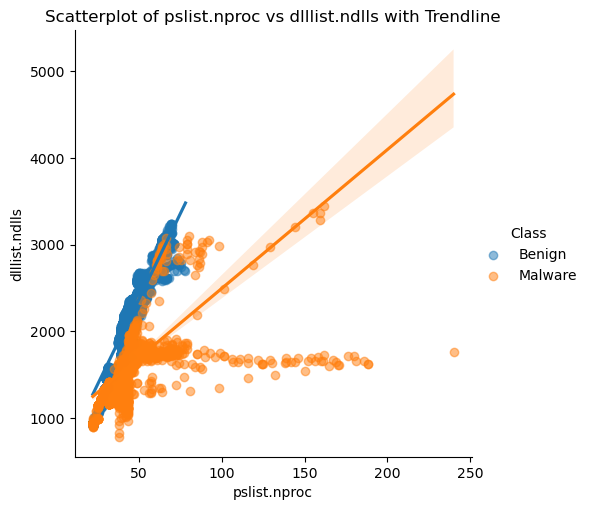

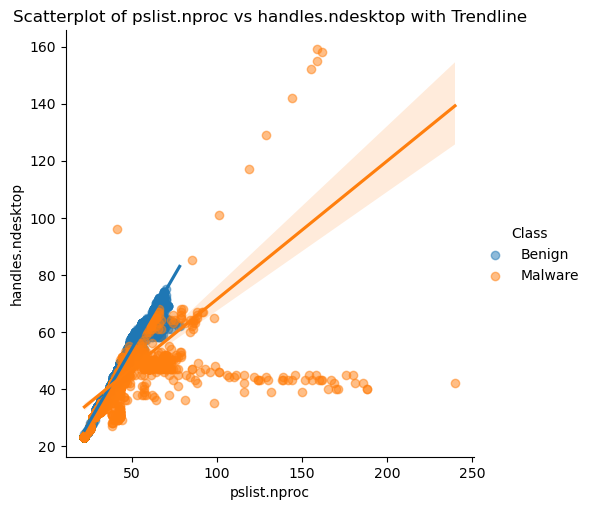

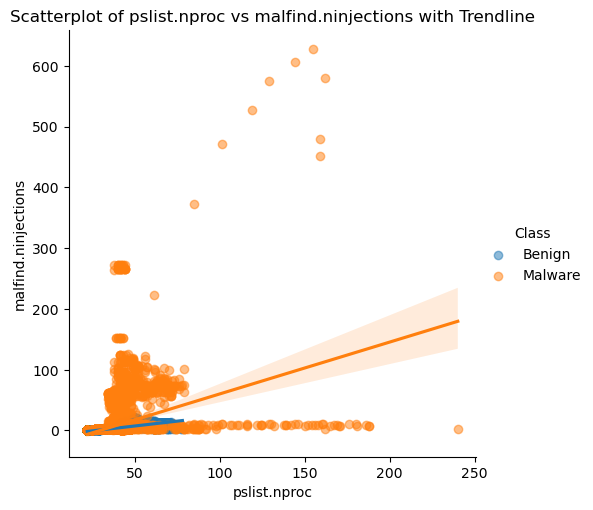

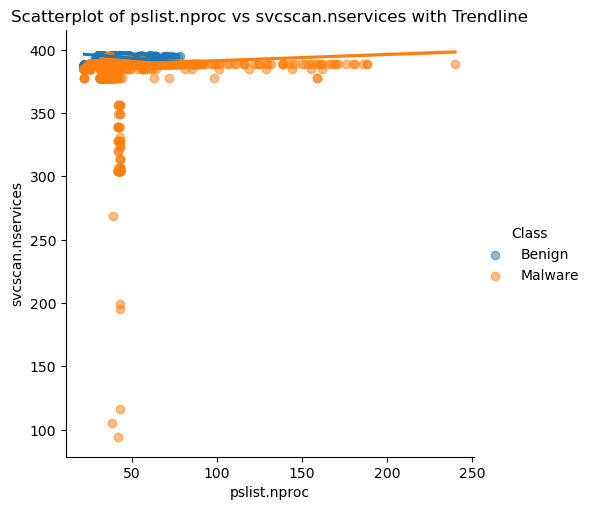

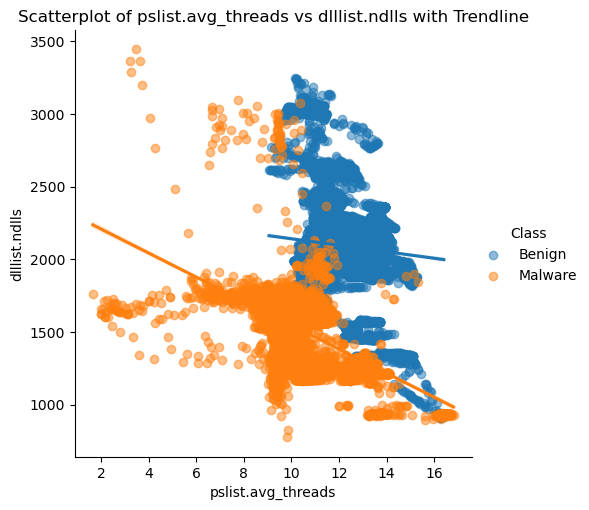

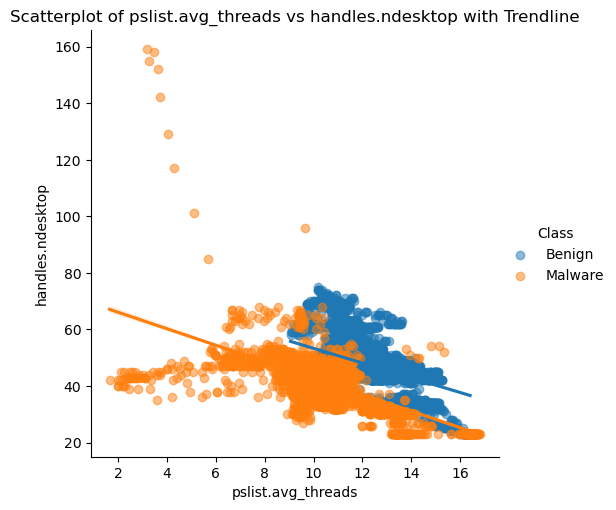

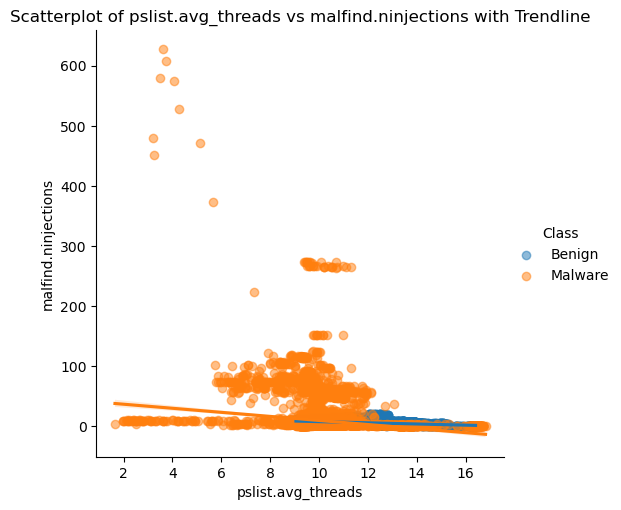

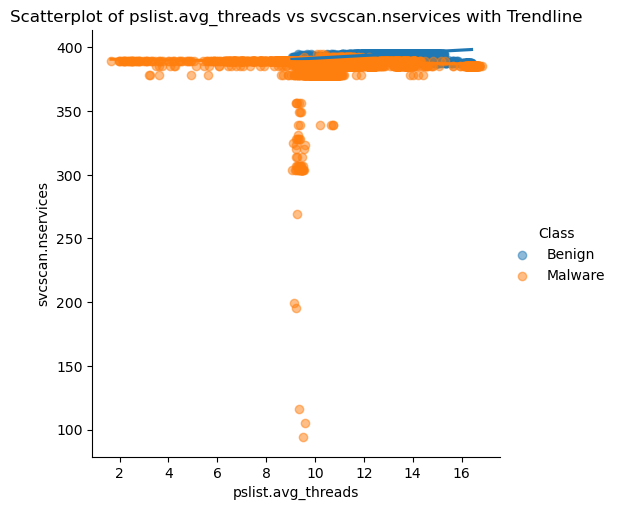

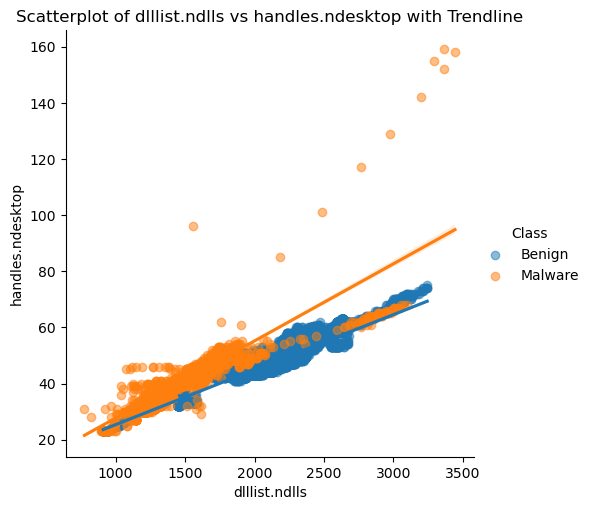

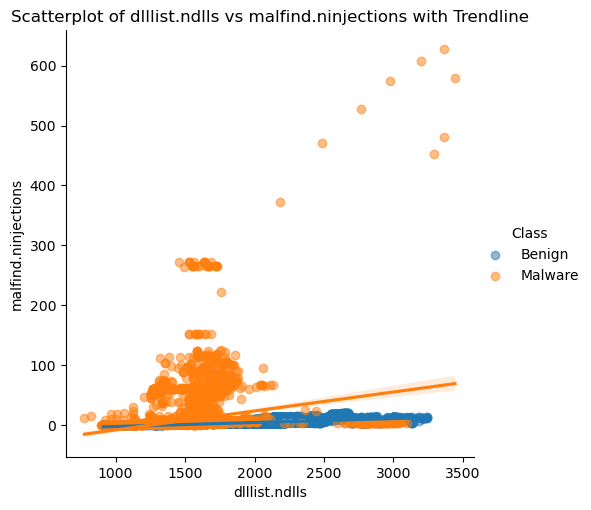

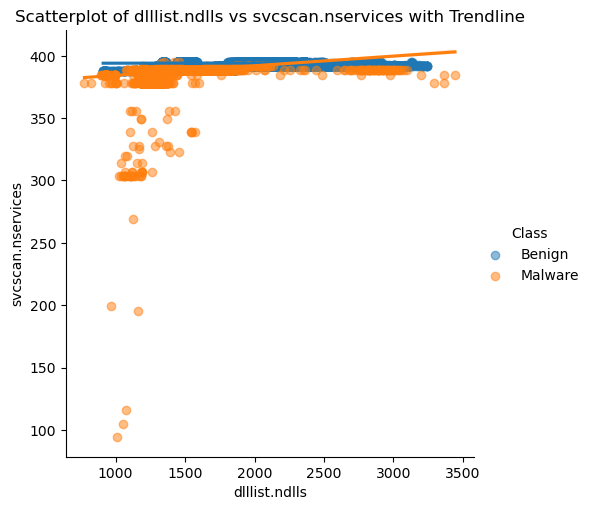

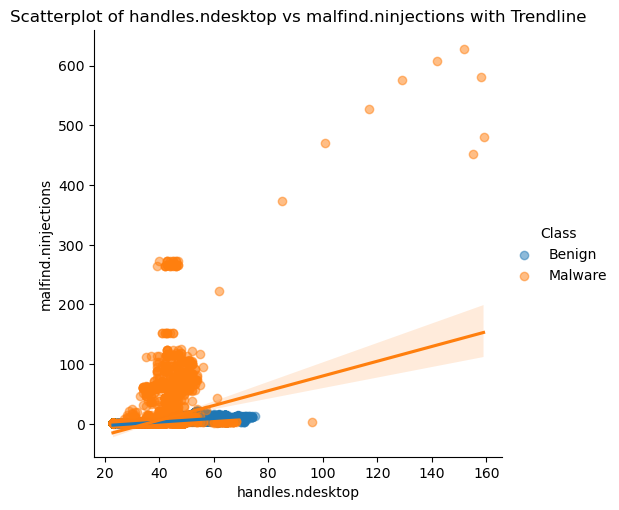

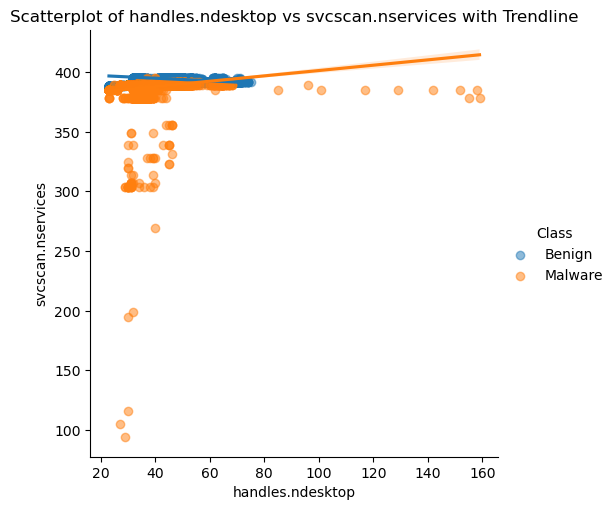

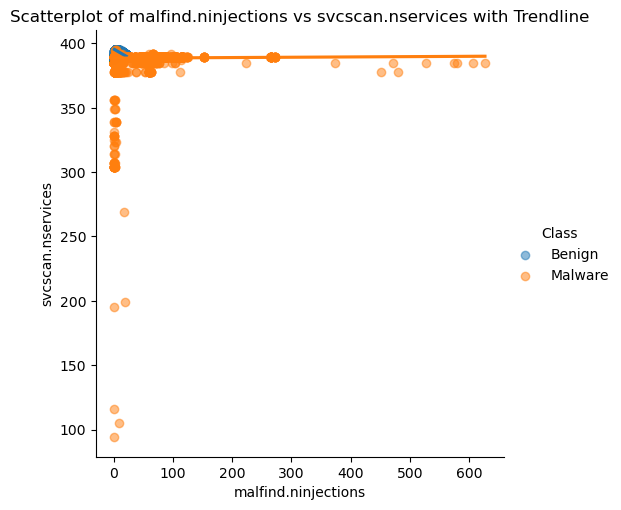

In [30]:
# Generating graphs that display scattered data points and trendlines.
for i in range(len(analysis.columns)-1):
    for j in range(i+1, len(analysis.columns)-1):
        sns.lmplot(x=analysis.columns[i], y=analysis.columns[j], data=analysis, hue='Class', scatter_kws={'alpha': 0.5})
        plt.title(f'Scatterplot of {analysis.columns[i]} vs {analysis.columns[j]} with Trendline')
        plt.show()

# Predictive analysis

In [31]:
#Importing libraries for predictions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
#Choosing the characteristics and outcome variable.
charac = ['pslist.nproc', 'pslist.avg_threads', 'dlllist.ndlls', 'handles.ndesktop', 'malfind.ninjections', 'svcscan.nservices']
outcome = 'Class'

In [33]:
# Dividing the data that has been cleaned into separate sets for training and testing purposes.
X_train, X_test, y_train, y_test = train_test_split(mem[charac], mem[outcome], test_size=0.2, random_state=42)

In [34]:
#Assigning and Starting a Random Forest classifier.
rfc = RandomForestClassifier()

In [35]:
#training the categorizer using the training dataset.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
#Making forecasts and predcitions.
y_pred = rfc.predict(X_test)

In [37]:
#Model Evaluation
precision = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [38]:
#Generating a report that displays the precision and categorization of the printed material
print("Accuracy:", precision)
print("Classification Report:")
print(report)

Accuracy: 0.9997416243217638
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5798
     Malware       1.00      1.00      1.00      5813

    accuracy                           1.00     11611
   macro avg       1.00      1.00      1.00     11611
weighted avg       1.00      1.00      1.00     11611

